In [4]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
ff1.plotting.setup_mpl()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from joblib import load
from joblib import dump

import os
import pickle

import numpy as np
import pandas as pd
ff1.Cache.enable_cache('C:/Users/benme/OneDrive - The Perse School/Formula 1')

In [5]:
race_year = ""
race_name = ""
correct = False

In [6]:
while correct == False:
    try:
        with open(f'tyres_{race_year}.pickle', 'rb') as handle:
            tyre_year = pickle.load(handle)
        tyre_year[race_name]
        correct = True
    except:
        print("No race of that name \n "
              "Use name in the format 'Australian' or 'British' not 'Australia' \n"
              "Try again")
        race_name, race_year = input("Enter race name"), int(input("Enter race year"))
race = ff1.get_session(race_year, race_name, 'R')
race.load()

No race of that name 
 Use name in the format 'Australian' or 'British' not 'Australia' 
Try again


core           INFO 	Loading data for Italian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '44', '11', '4', '10', '45', '24', '31', '47', '77', '22', '6', '20', '3', '18', '14', '5']


In [7]:
#race.laps.to_excel('test.xlsx')

In [8]:
choice = int(input("Enter an option number: \n"
                   "1. Lap Time vs Lap Number \n"
                   "2. Delta to Leader \n"
                   "3. Tyre Delta \n"))
continue_ = True
drivers_list = []


if choice == 1:
    while continue_ == True:
        drivers = input("Which driver(s) would you like to plot \n"
                        "Input 'all' for all drivers \n"
                        "Else input each driver one by one using their three letter identifier and type 'finish' when done")
        if drivers == 'all' or drivers == 'finish':
            break
        else:
            drivers_list.append(drivers.upper())

    if len(drivers_list) < 10:
        line_width = 10
    else:
        line_width = 7

    if not drivers == 'all':
        race_laps = race.laps.pick_accurate().pick_drivers(drivers_list).filter(items = ['Driver', 'LapTime', 'Compound', 'LapNumber', 'FreshTyre', 'TrackStatus', 'Stint'])
    else:
        race_laps = race.laps.pick_accurate().filter(items = ['Driver', 'LapTime', 'Compound', 'LapNumber', 'FreshTyre', 'TrackStatus', 'Stint'])


elif choice == 2:
    while len(drivers_list) <= 5 and continue_ == True:
        drivers = input("Which driver(s) would you like to plot (max. 5 drivers) \n"
                        "Input 'all' for all drivers \n"
                        "Else input each driver one by one using their three letter identifier and type 'finish' when done")
        if drivers == 'finish':
            continue_ = False
        else:
            drivers_list.append(drivers.upper())

    line_width = 10

    race_laps = race.laps.pick_drivers(drivers_list).filter(items = ['Driver', 'LapNumber', 'FreshTyre', 'TrackStatus', 'Stint', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'IsAccurate'])


elif choice == 3:
    drivers = input("Enter the three letter identifier for the driver you would like to analyse")


In [9]:

tyres = []
tyres = ['soft', 'medium', 'hard']
compounds = []

changedNames = {
    "Sauber": "Alfa Romeo"
}
#race_laps.to_excel('test.xlsx')

QUARTER_SECOND = 2.89351851851852E-06

In [10]:
##--------------------Save File--------------------##
my_path = os.path.abspath('C:/Users/benme/OneDrive - The Perse School/Formula 1')
event_date = ""
event_name = ""
for x in str(race.event.EventDate):
    if not x == " ":
        event_date += x
    else:
        break
for x in race.event.EventName:
    if x == " ":
        x = "_"
    event_name += x
plot_location = f'{my_path}\\{race.event.year}\\{event_date}_{event_name}\\{event_date}_Race'
print(plot_location)

C:\Users\benme\OneDrive - The Perse School\Formula 1\2022\2022-09-11_Italian_Grand_Prix\2022-09-11_Race


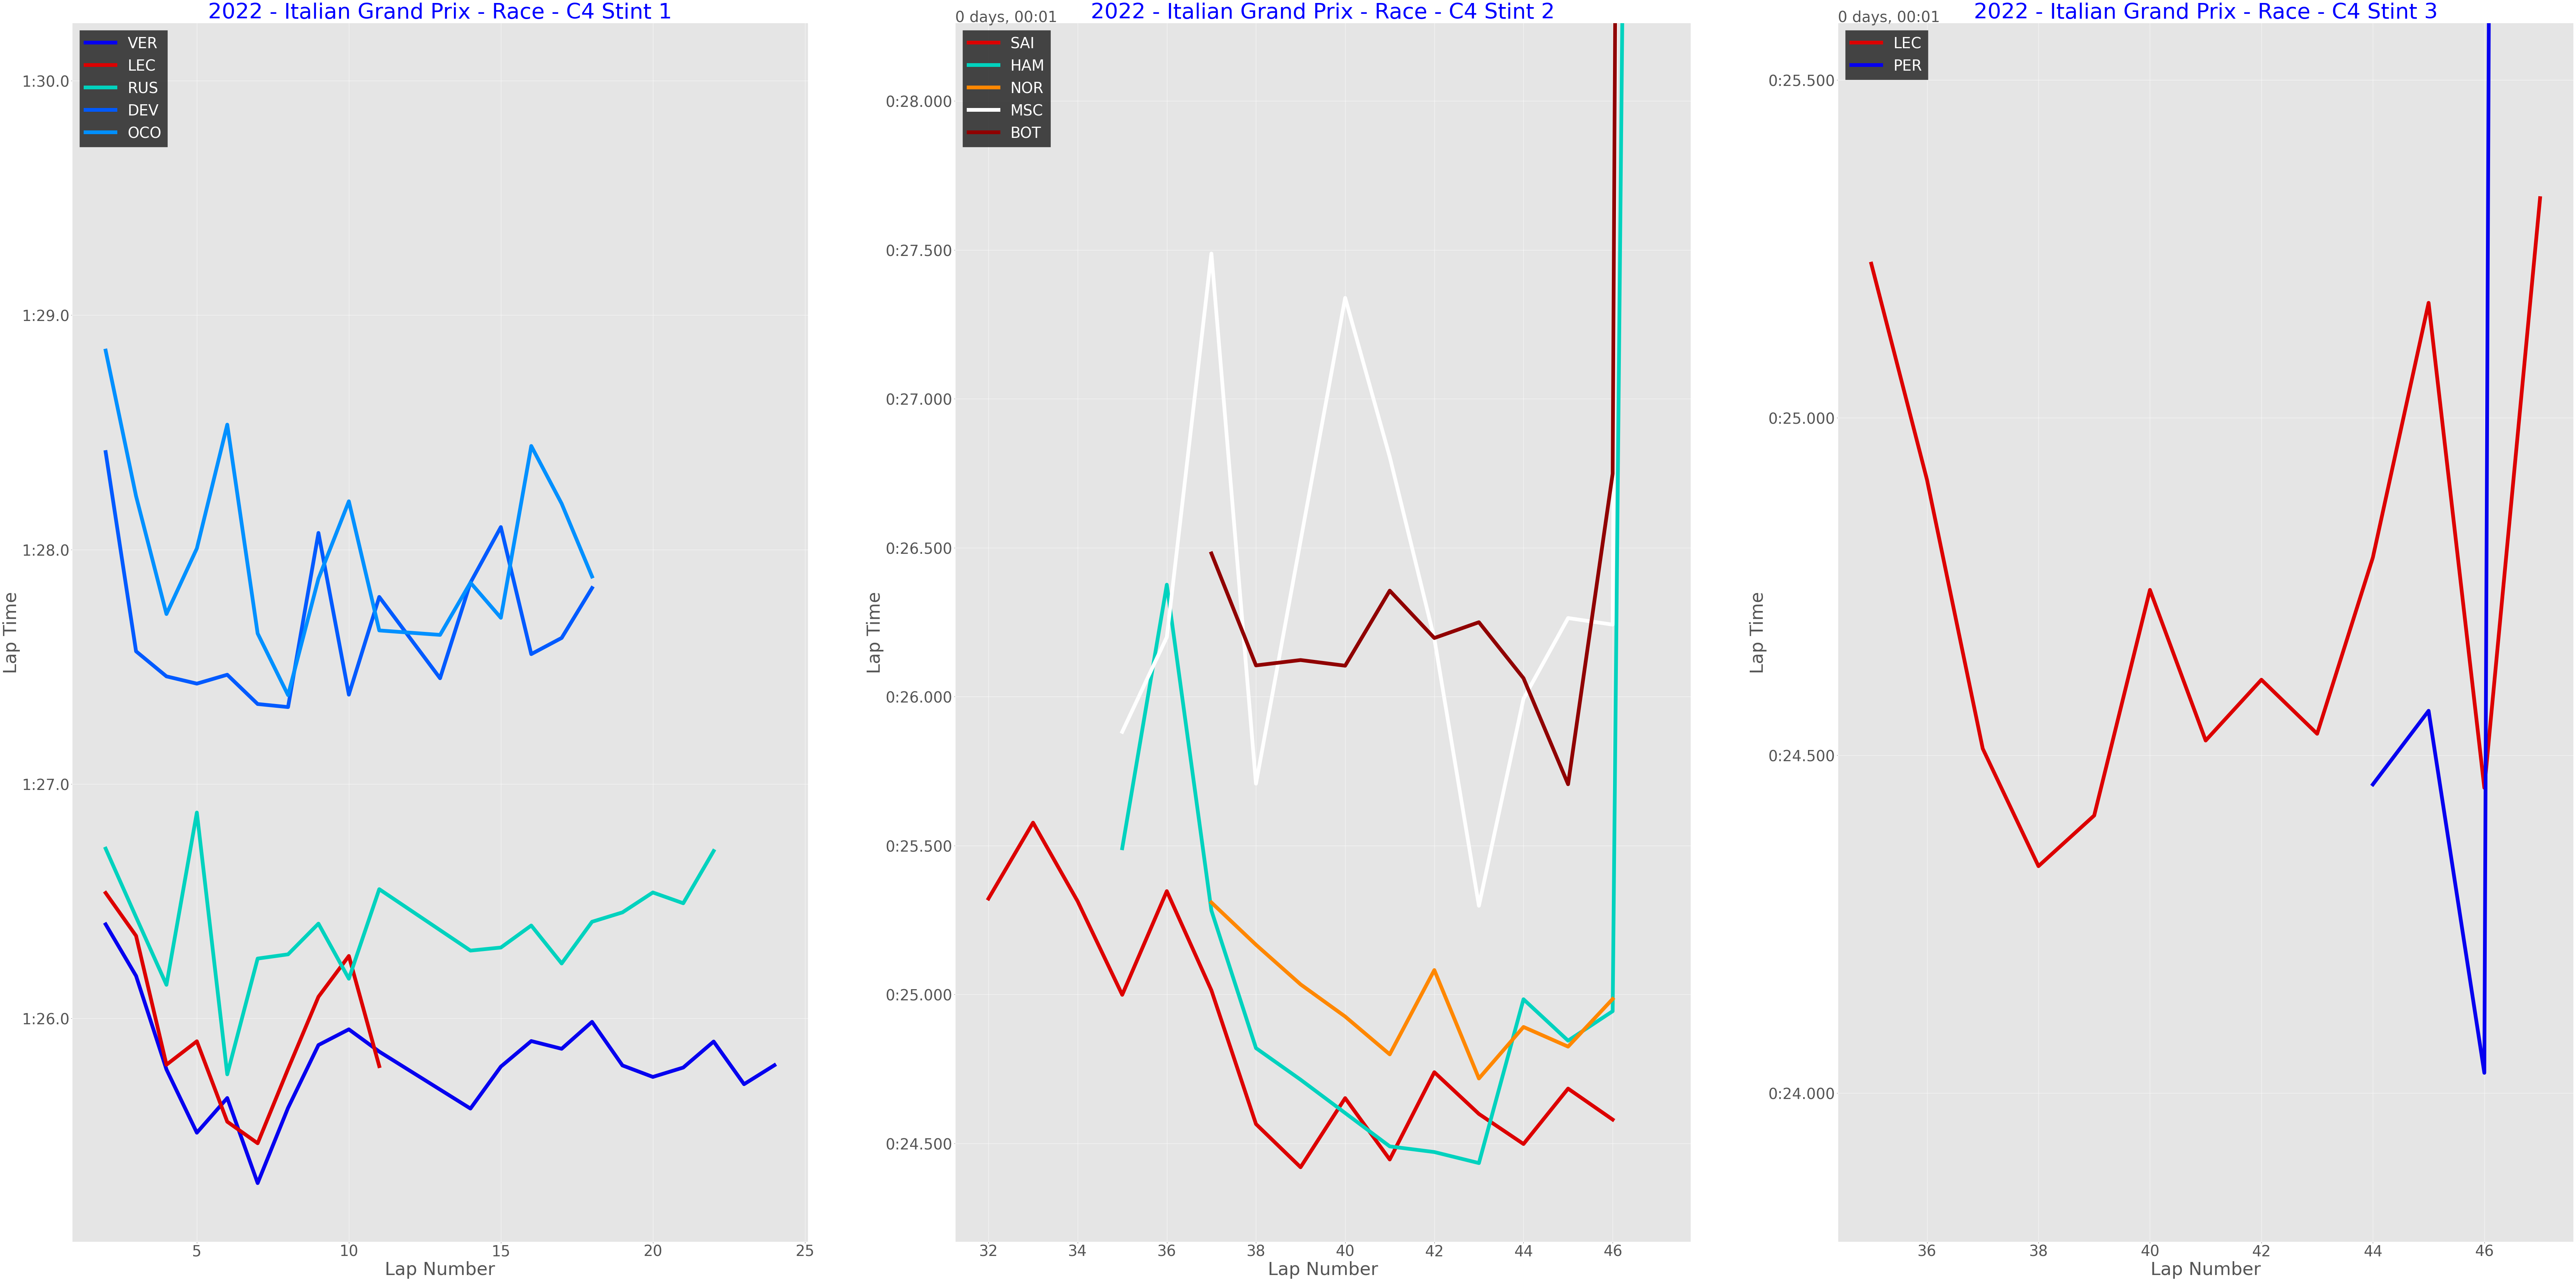

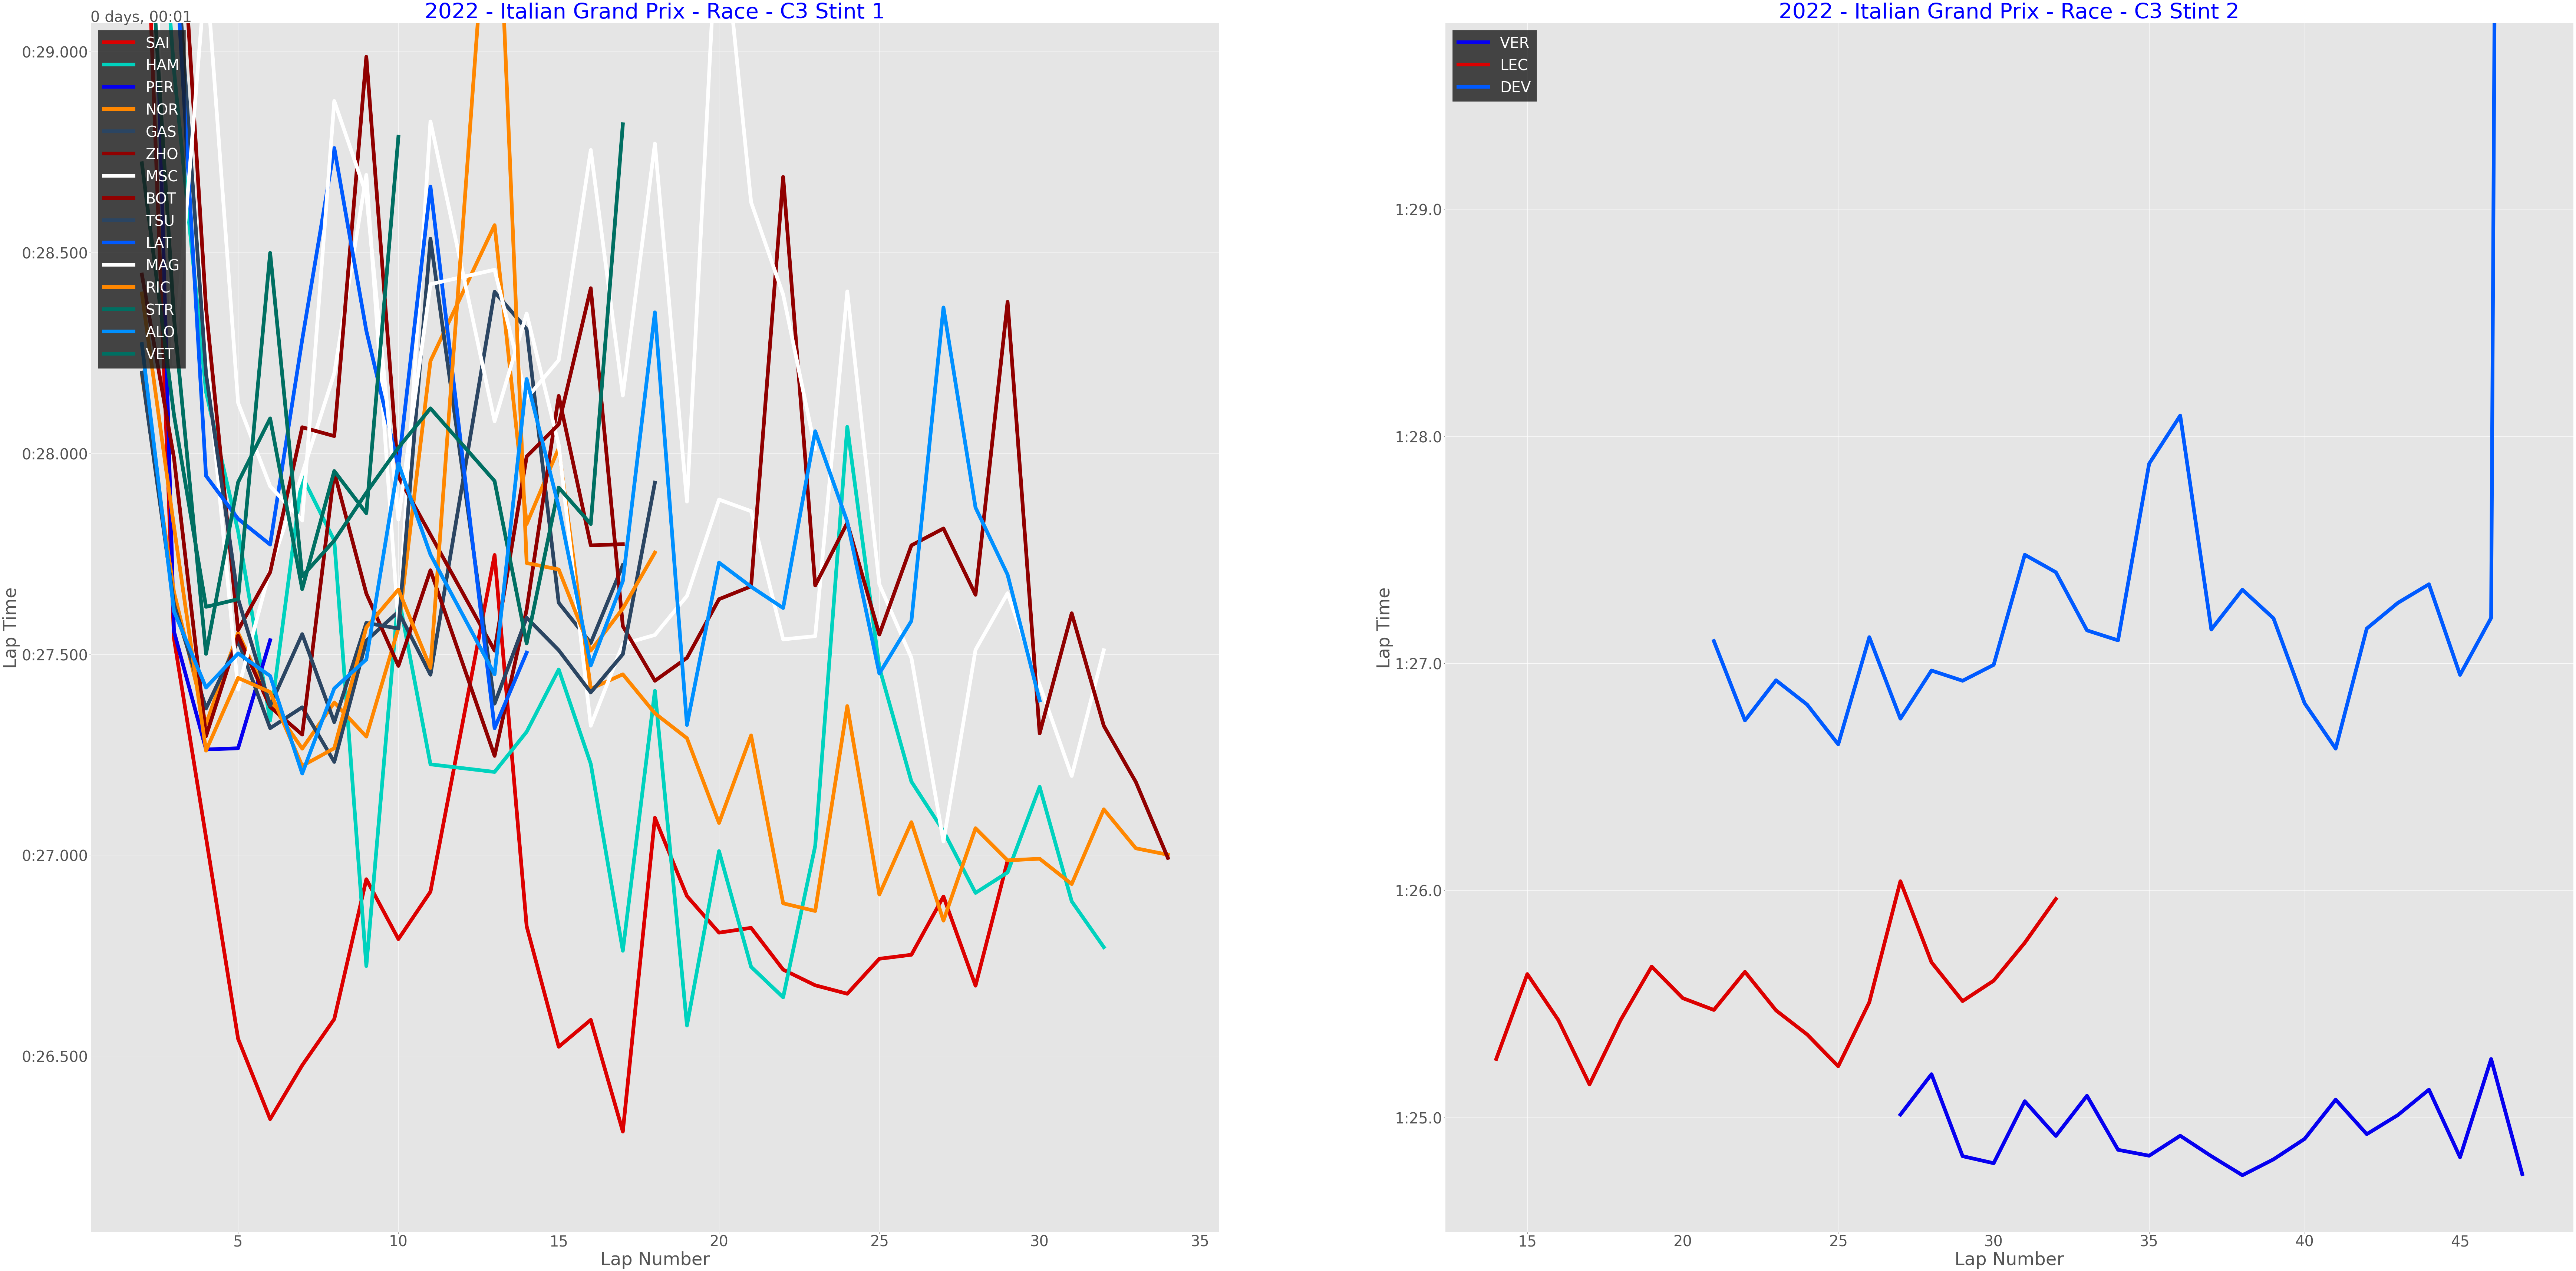

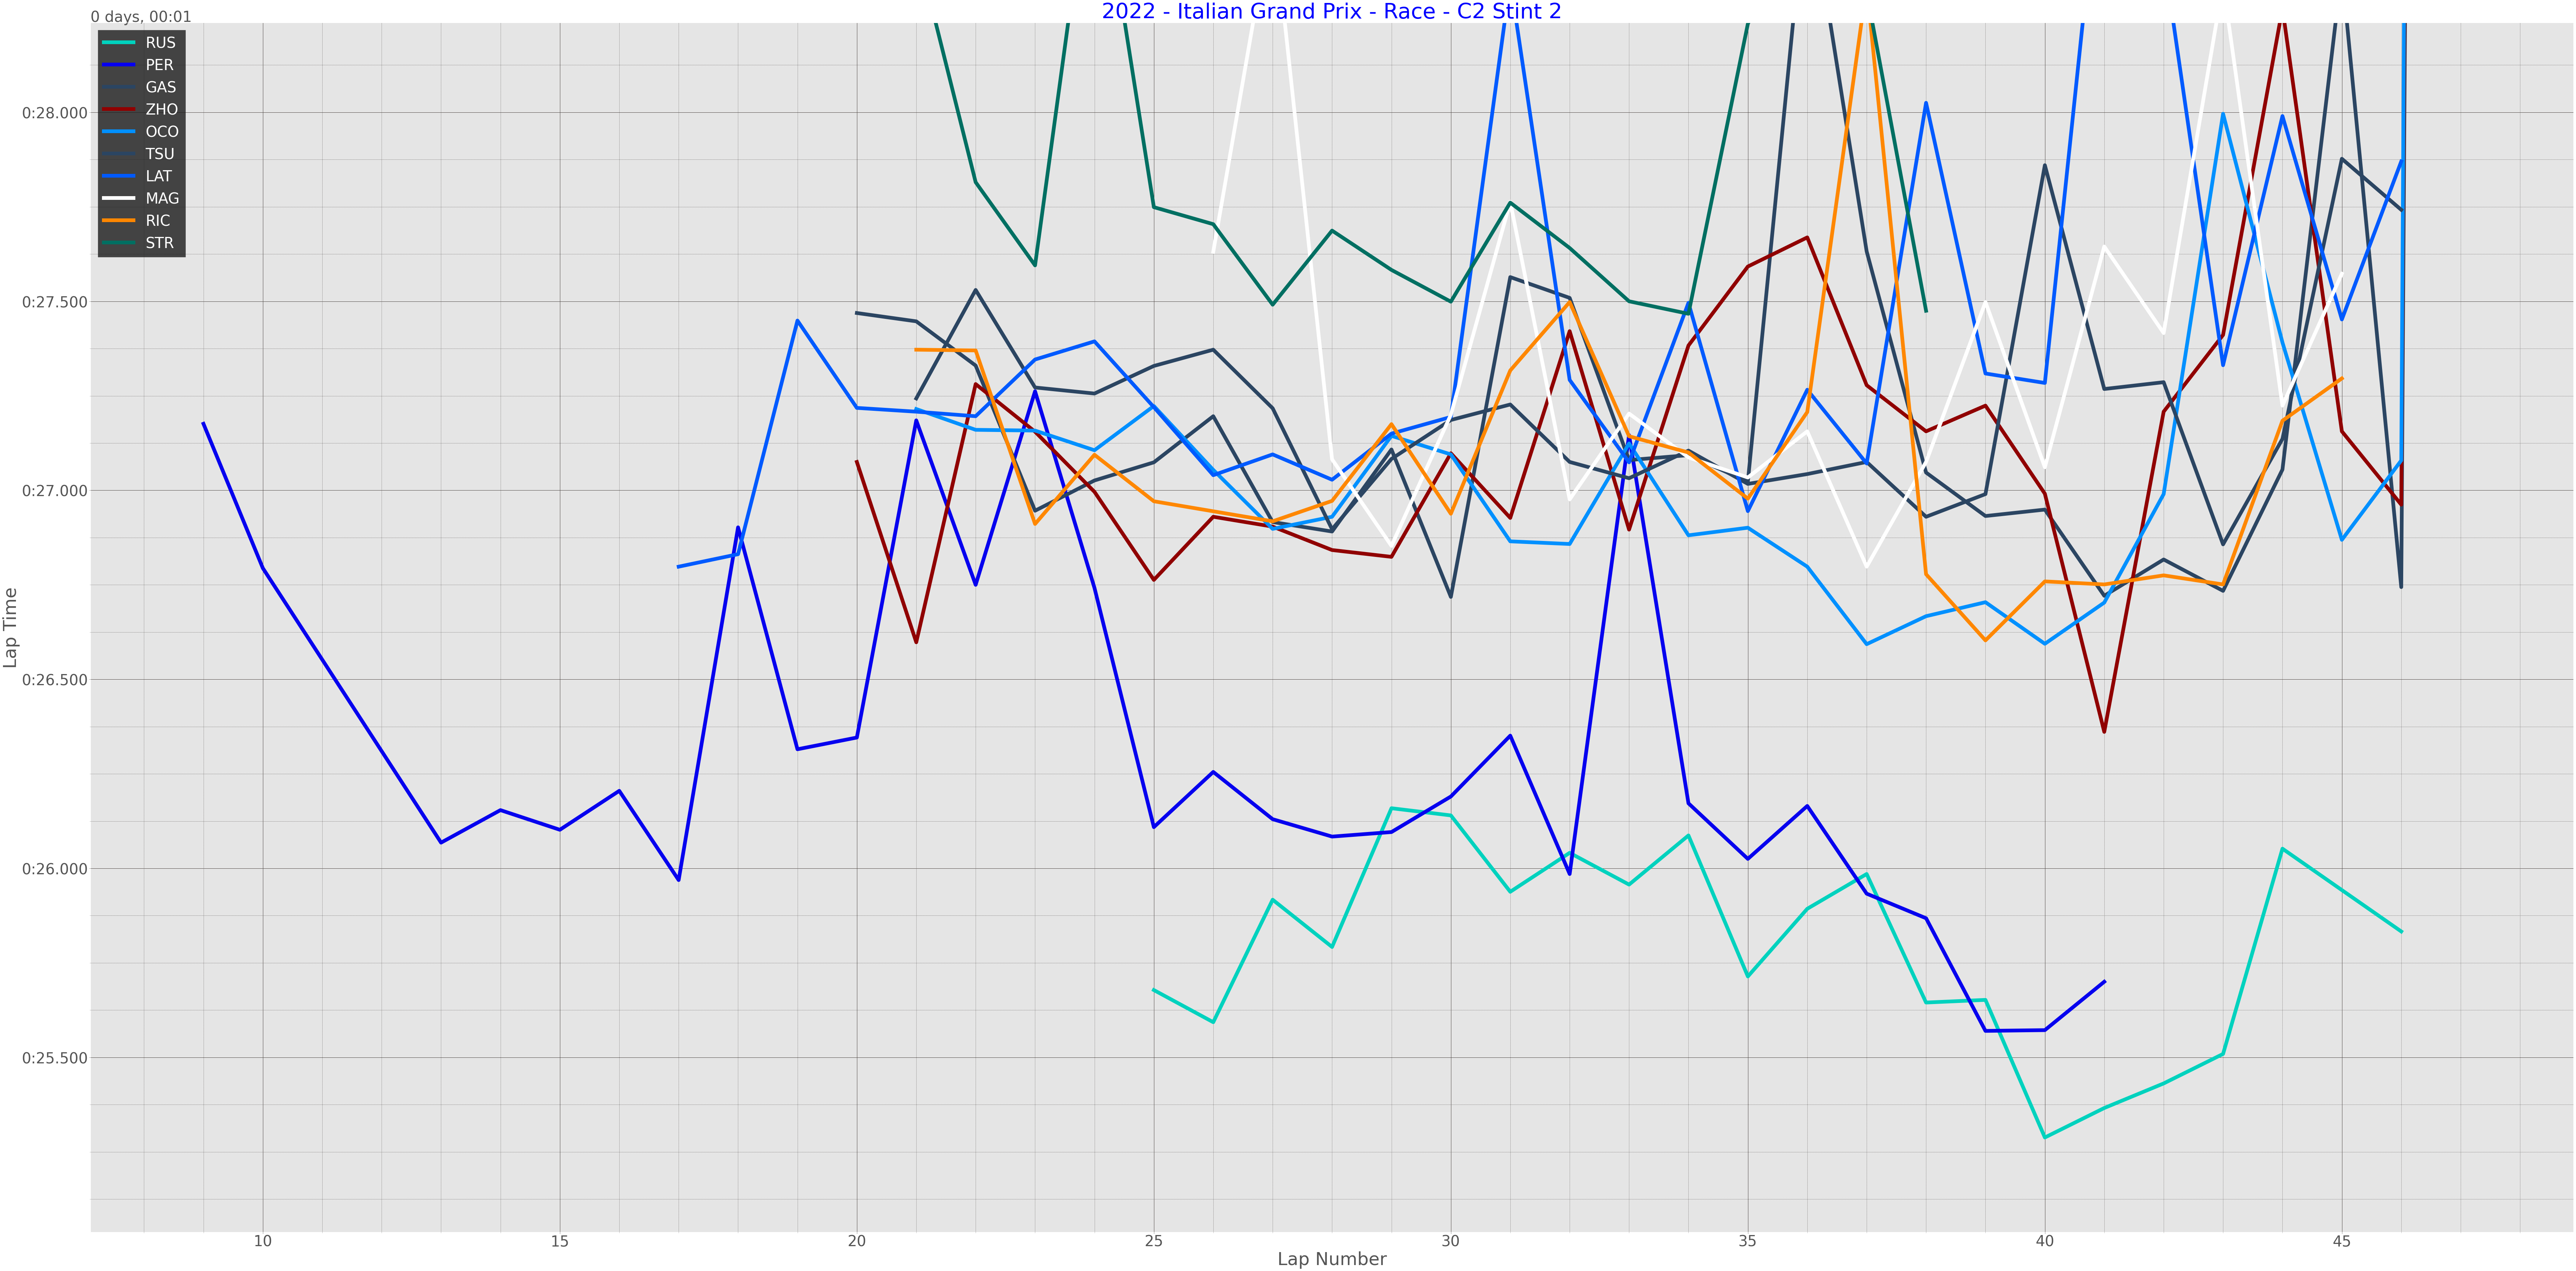

In [11]:
if race_year == 2018:
    tyres = ['ultrasoft', 'hypersoft', 'supersoft', 'soft', 'medium', 'hard']
    compounds = tyres
else:
    compounds = tyre_year[race_name]




if choice == 1:
    dict_1 = {}
    for f in tyres:
        tyre_compound = race_laps['Compound'] == f.upper()
        tyre_compound = race_laps[tyre_compound]
        if tyre_compound.empty:
            print("")
        else:
            stint_number_range = int(tyre_compound['Stint'].max()-tyre_compound['Stint'].min())+1
            stint_number = int(tyre_compound['Stint'].min())

            if f == 'hard' and race_year != 2018:
                f = compounds[0]
            elif f == 'medium' and race_year != 2018:
                f = compounds[1]
            elif f == 'soft' and race_year != 2018:
                f = compounds[2]


            plot_size = (120, 60)
            if not drivers == 'all':
                plot_title = f'{race.event.year} - {race.event.EventName} - {race.name} - {drivers_list} - {f.upper()}'
            else:
                plot_title = f'{race.event.year} - {race.event.EventName} - {race.name} - {f.upper()}'
            plot_filename = plot_title.replace(" ", "") + '.png'
            plt.style.use('ggplot')
            plt.rcParams['figure.figsize'] = plot_size
            plt.rcParams['text.color'] = 'b'
            plt.rcParams['legend.labelcolor'] = 'w'
            plt.rcParams['font.size'] = 40
            fig, ax = plt.subplots(stint_number_range)

            for l in range(0, int(stint_number_range)):
                dict_= {}
                tyre_compound_stint = tyre_compound['Stint'] == (stint_number)
                tyre_compound_stint = tyre_compound[tyre_compound_stint]
                driver_list = (tyre_compound_stint['Driver'].tolist())

                if tyre_compound_stint.empty:
                    print("")
                else:
                    q1, q3 = np.percentile(tyre_compound_stint['LapTime'], [25,75])
                    iqr = q3-q1
                    upper = q3+(1.5*iqr)

                driver = ""
                for n in driver_list:
                        if driver != n:
                            driver = n
                            dict_[driver] = tyre_compound_stint.pick_driver(driver)
                            dict_1[f'{driver} {f}'] = tyre_compound_stint.pick_driver(driver)

                            team = race.laps.pick_driver(driver).pick_fastest()['Team']
                            if team in changedNames:
                                team = changedNames[team]

                            team_color = ff1.plotting.team_color(team)

                            ax = plt.subplot(1, stint_number_range, l+1)
                            ax = plt.gca()
                            ax.plot(dict_[driver]['LapNumber'], dict_[driver]['LapTime'],color=team_color, label=driver, linewidth = line_width)
                            ax.set_ylim(ax.axes.dataLim.min[1] - QUARTER_SECOND, upper)
                            ax.set(xlabel='Lap Number', ylabel='Lap Time', title=f"{plot_title} Stint {stint_number}")
                            ax.legend(loc='upper left')


                plt.savefig(os.path.join(plot_location,plot_filename))
                stint_number += 1
    lap_times_file = open(f'laptimes_{race_name}_{race_year}.pickle', 'wb')
    pickle.dump(dict_1, lap_times_file)
    lap_times_file.close()


elif choice == 2:
    max_lap = int(race_laps['LapNumber'].max())
    sectors = ['Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime']
    delta_df = pd.DataFrame([], columns=['Driver', 'Lap Number', 'Delta'])


    for w in range(0, max_lap):
        race_lap = race_laps['LapNumber'] == (w + 1)
        race_lap = race_laps[race_lap]

        for x in range(len(sectors)):
            lap_place = float("{:.2f}".format((x / 3) + (w + 1)))
            pace = race_lap[sectors[x]].min()

            for y in range(len(race_lap)):
                time = race_lap[sectors[x]].iloc[[y]].values[0] - pace
                #print(time)
                driver = race_lap['Driver'].iloc[[y]].str.strip().to_string(index=False)
                data = {'Driver': [driver],
                        'Lap Number': [lap_place],
                        'Delta': [time]}
                s1 = pd.DataFrame(data)
                delta_df = pd.concat([delta_df, s1])
    #delta_df.to_excel('Delta Test.xlsx')


    delta_df_drivers = delta_df['Lap Number'] == 1
    delta_df_drivers = delta_df[delta_df_drivers]
    driver_list = delta_df_drivers['Driver'].tolist()
    dict_ = {}

    plot_size = (120, 60)
    if not drivers == 'all':
        plot_title = f'{race.event.year} - {race.event.EventName} - {race.name} - {drivers_list} - Delta to Leader'
    else:
        plot_title = f'{race.event.year} - {race.event.EventName} - {race.name} - Delta to Leader'
    plot_filename = plot_title.replace(" ", "") + '.png'
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = plot_size
    plt.rcParams['text.color'] = 'b'
    plt.rcParams['legend.labelcolor'] = 'w'
    plt.rcParams['font.size'] = 40
    fig, ax = plt.subplots(1)

    for n in driver_list:
        #print(n)
        dict_[n] = delta_df.loc[(delta_df['Driver'] == n)]
    #print(dict_)
        dict_[n].to_excel('test.xlsx')
        team = race.laps.pick_driver(n).pick_fastest()['Team']
        if team in changedNames:
            team = changedNames[team]
        team_color = ff1.plotting.team_color(team)

        ax = plt.gca()
        ax.plot(dict_[n]['Lap Number'], dict_[n]['Delta'], color=team_color, label=n, linewidth = line_width)
        ax.set(xlabel='Lap Number', ylabel='Delta to Leader', title=plot_title)
        ax.legend(loc='upper left')
    plt.savefig(os.path.join(plot_location,plot_filename))